-------------------------

# Аналитика гипотез для увеличения выручки

В нашем распоряжении данные крупного интернет-магазина. Вместе с отделом маркетинга подготовилен список гипотез для увеличения выручки.Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты. 



-------------------------

## Шаг 1. Откроем и изучим файлы, подготовим данные к анализу

In [1]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import seaborn as sns

# открываем файлы, в качестве разделителя указываем ','
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv', sep=',')
    orders = pd.read_csv('/datasets/orders.csv', sep=',')
    visitors = pd.read_csv('/datasets/visitors.csv', sep=',')
except:
    hypothesis= pd.read_csv('hypothesis.csv', sep=',')
    orders= pd.read_csv('orders.csv', sep=',')
    visitors= pd.read_csv('visitors.csv', sep=',')

# устанавливаем отображение количества столбцов экране и ширину столбцов
pd.options.display.max_columns = 25
pd.set_option('max_colwidth', 120)

#ограничим формат float 3 знаками после точки
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import warnings
warnings.filterwarnings('ignore')

##### Изучим таблицы

In [2]:
#изучим таблицы, информацию о них методами info() и describe()
print('\033[1mТаблица с гипотезами\033[0m')
display(hypothesis.head(10))
hypothesis.info()

print('')
print('-----------------------------------')
print('\033[1mТаблица с покупками\033[0m')
display(orders.head())
orders.info()
display(orders.describe())

print('')
print('-----------------------------------')
print('\033[1mТаблица с посетителями\033[0m')
display(visitors.head())
visitors.info()
print('')
print ('\033[1m' + 'Вывод метода describe()' + '\033[0m')
display(visitors.describe())

Таблица с гипотезами


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes

-----------------------------------
Таблица с покупками


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,revenue
count,1197.000,1197.000,1197.000
mean,2155621385.530,2165960143.099,8348.006
std,1229084904.760,1236014192.147,39191.132
min,1062393.000,5114589.000,50.000
25%,1166775572.000,1111826046.000,1220.000
50%,2145193898.000,2217984702.000,2978.000
75%,3237740112.000,3177606451.000,8290.000
max,4293855558.000,4283872382.000,1294500.000



-----------------------------------
Таблица с посетителями


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB

Вывод метода describe()


,visitors
count,62.000
mean,607.290
std,114.401
min,361.000
25%,534.000
50%,624.500
75%,710.500
max,770.000


In [3]:
#проверим наличие дубликатов в таблицах
duplicated1 = orders.duplicated().sum()
print('Количество полных дубликатов составляет\033[1m',duplicated1,'\033[0m')

duplicated2 = visitors.duplicated().sum()
print('Количество полных дубликатов составляет\033[1m',duplicated2,'\033[0m')


Количество полных дубликатов составляет 0 
Количество полных дубликатов составляет 0 


Мы можем заметить некоторые проблемы, так в некоторых типах данных **избыточная битность** (например в столбце visitors  таблицы visitors битность 64), можно будет заменить на меньшую битность. Значения дат имеют тип объект, нужно привести к типу datetime64.  Также метод describe() показал нам наличие **выбросов**, например в выручке от покупок (1294500 при медиане в 2978). Зато радует, что в данных нет пропусков и дубликатов.

##### Опишем данные

В датафрейме `hypothesis` содержатся следущие данные:

    Hypothesis - 9 выдвинутых гипотез
    Reach - охват, скольких пользователей затронет изменение
    Impact - влияние, насколько сильно изменение повлияет на пользователей
    Confidence - степень уверенности, что это изменение повлияет на пользователей
    Effort - усилия, сколько стоит протестировать гипотезу

В датафрейме `orders` содержатся следущие данные о A/B тесте:

    transactionId -  идентификатор заказа
    visitorId - идентификатор пользователя, совершившего заказ
    date - дата заказа
    revenue - выручка заказа
    group - группа A/B-теста

В датафрейме `visitors` содержатся следущие данные о A/B тесте:

    date -  дата посещения
    group - группа A/B-теста
    visitors - количество посетителей



##### Обработаем типы данных

Оптимизируем типы данных приведением к минимально подходящим. Столцбы с датой и временем приведем к формату datetime64

In [4]:
#используем понижающее приведение downcast метода pd.to_numeric() 
hypothesis[['Reach','Impact','Confidence','Efforts']] = hypothesis[['Reach','Impact','Confidence','Efforts']]\
    .apply(lambda x: pd.to_numeric(x, downcast='integer'))
orders['revenue'] = pd.to_numeric(orders['revenue'], downcast='integer')
visitors['visitors'] = pd.to_numeric(visitors['visitors'], downcast='integer')

#столбцы с датой приведем к формату datetime64
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')

## Шаг 2. Приоритизация гипотез

### Посредством метода ICE

Приведем формулу расчета ICE

$$ICE = \frac{Impact * Confidence}{Efforts}$$

In [5]:
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
display(hypothesis[['Hypothesis','ICE']].sort_values(by='ICE', ascending=False))

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000


Наиболее перспективные гипотезы по ICE: 8, 0, 7, 6

### Посредством метода RICE

Приведем формулу расчета RICE

$$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$

In [6]:
hypothesis['RICE'] = hypothesis['Impact'] * hypothesis['Reach'] * hypothesis['Confidence'] / hypothesis['Efforts']
display(hypothesis[['Hypothesis','RICE','Reach']].sort_values(by='RICE', ascending=False))

,Hypothesis,RICE,Reach
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.000,5
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200,1
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",9.600,10
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.000,8
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.000,2
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.000,3
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.000,3
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",-2.667,3
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",-29.333,8


Наиболее перспективные гипотезы по RICE: 6, 8, 7, 3

Как мы видим приоритизация гипотез при применении RICE вместо ICE изменилась, это произошло, потому что RICE учитывает количество пользователей, которых затронут изменения. В топ4 на первое место вышла гипотеза 6 с охватом 5, и исчезла гитотеза 0, с охватом 3.

С учетом того, что первое место безоговорочно заняла гипотеза №6 "Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию", то проверять будем её.

-------------------------

## Шаг 3. Анализ A/B-теста


Нами проведен A/B-тест и получены результаты, которые описаны в сохраненных датафреймах orders и visitors. Необходимо изучить их и принять решение по результатам теста. Варианты решений: 

1. Остановить тест, зафиксировать победу одной из групп. 
2. Остановить тест, зафиксировать отсутствие различий между группами. 
3. Продолжить тест.

##### Построим график кумулятивной выручки по группам

In [7]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 

In [8]:
#cоберём агрегированные кумулятивные по дням данные о заказах
ordersAggregated = datesGroups.apply(
    #Получим строки таблицы orders, дата которых меньше или равна дате элемента из datesGroups, а группа теста равна группе из datesGroups:
    lambda x: orders[(orders['date'] <= x['date']) & (orders['group'] == x['group'])].agg({ 
'date' : 'max',
'group' : 'max',
'transactionId' : 'nunique',
'visitorId' : 'nunique',
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

#получим агрегированные кумулятивные по дням данные о посетителях
visitorsAggregated = datesGroups.apply(
lambda x: visitors[(visitors['date'] <= x['date']) & (visitors['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

#объединим агрегированные кумулятивные по дням данные
cumData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

#разделим данные по группам теста
cumRevenueA = cumData[cumData['group']=='A'][['date','revenue', 'orders']]
cumRevenueB = cumData[cumData['group']=='B'][['date','revenue', 'orders']]

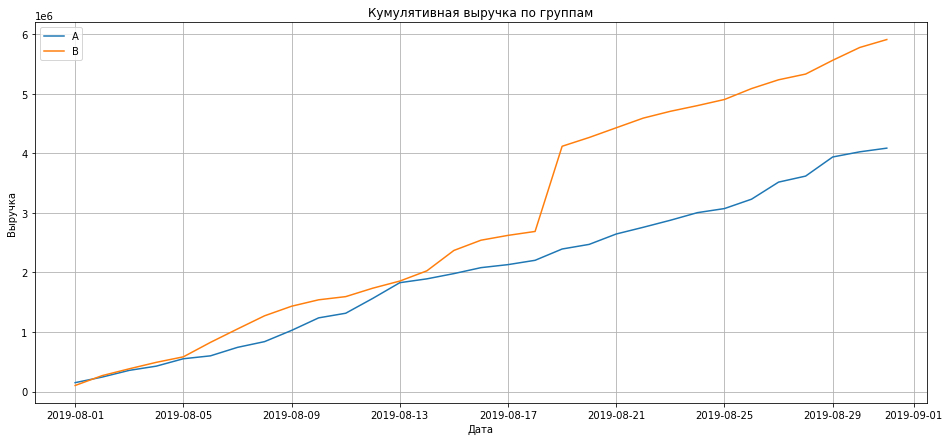

In [9]:
plt.figure(figsize=(16,7))
# Строим график выручки группы А
plt.plot(cumRevenueA['date'], cumRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumRevenueB['date'], cumRevenueB['revenue'], label='B')
plt.title("Кумулятивная выручка по группам")
plt.xlabel("Дата")
plt.ylabel("Выручка")
plt.grid()
plt.legend() 
plt.show()

Выручка почти равномерно увеличивается в течение всего теста. Однако график выручки группы **В резко вырос** после 17.08.2019, это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. Проанализируем выбросы позже.

##### Построим график кумулятивного среднего чека по группам

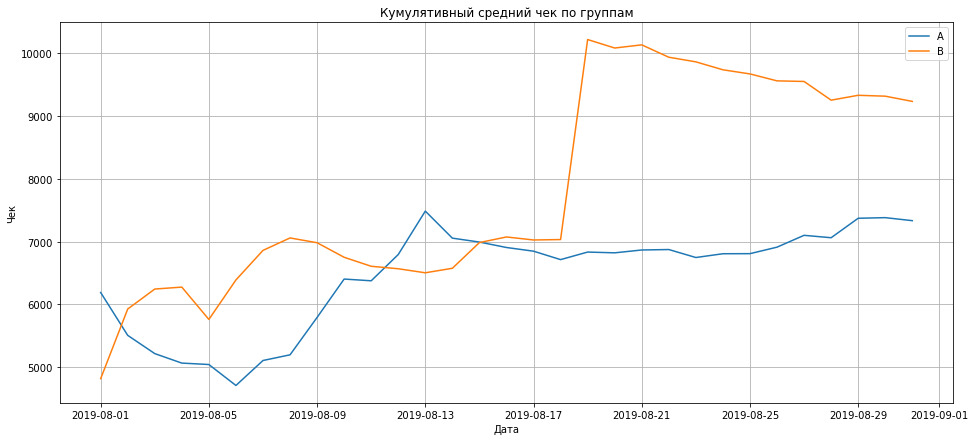

In [10]:
#получим средний чек, разделив выручку на количество покупок
plt.figure(figsize=(16,7))
plt.plot(cumRevenueA['date'], cumRevenueA['revenue']/cumRevenueA['orders'], label='A')
plt.plot(cumRevenueB['date'], cumRevenueB['revenue']/cumRevenueB['orders'], label='B')
plt.title("Кумулятивный средний чек по группам")
plt.xlabel("Дата")
plt.ylabel("Чек")
plt.grid()
plt.legend() 
plt.show()

Средний чек становится равномерным ближе к концу теста: установился для группы A, но продолжает снижаться для группы B. В группу **B** после 17.08.2019 **попали крупные заказы** (резкий всплеск на графике, явно есть выброс), и ей нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

##### Построим график относительного изменения кумулятивного среднего чека группы B к группе A

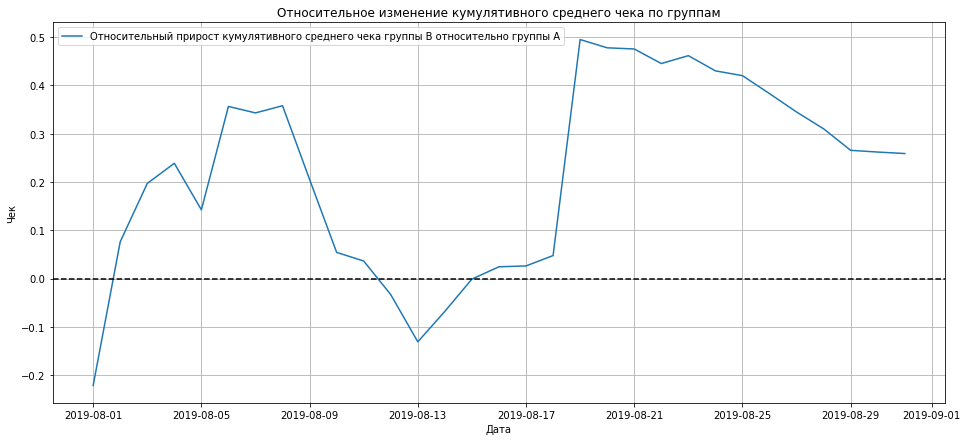

In [11]:
#объединим таблицы с выручками групп в один df
mergedCumRevenue = cumRevenueA.merge(cumRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(16,7))
#используем формулу кумулятивная метрика группы B / кумулятивная метрика группы A - 1.
plt.plot(mergedCumRevenue['date'], (mergedCumRevenue['revenueB']/mergedCumRevenue['ordersB'])\
         /(mergedCumRevenue['revenueA']/mergedCumRevenue['ordersA'])-1,
         label="Относительный прирост кумулятивного среднего чека группы B относительно группы A")
plt.title("Относительное изменение кумулятивного среднего чека по группам")
plt.xlabel("Дата")
plt.ylabel("Чек")
plt.legend()
plt.grid()
# выделим ось X с значением 0
plt.axhline(y=0, color='black', linestyle='--') 
plt.show()

В нескольких точках график различия между сегментами резко «скачет», это свидетельствует о наличии выбросов.

##### Построим график кумулятивной конверсии по группам

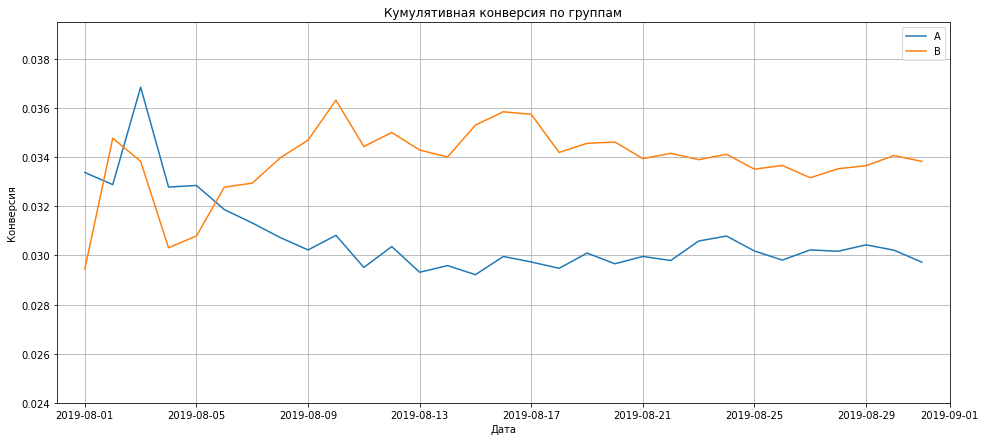

In [12]:
#добавим столбец с конверсией
cumData['conversion'] = cumData['orders']/cumData['visitors']

# отделяем данные по группе A
cumDataA = cumData[cumData['group']=='A']

# отделяем данные по группе B
cumDataB = cumData[cumData['group']=='B']

# строим графики
plt.figure(figsize=(16,7))
plt.plot(cumDataA['date'], cumDataA['conversion'], label='A')
plt.plot(cumDataB['date'], cumDataB['conversion'], label='B')
plt.title("Кумулятивная конверсия по группам")
plt.xlabel("Дата")
plt.ylabel("Конверсия")
plt.grid()
plt.axis(["2019-07-31", '2019-09-01', 0.024, 0.0395])
plt.legend()
plt.show()


Как мы видим на графике, в начале значения групп колебались, но затем конверсия группы В вырвалась вперёд и зафиксировалась, а конверсия группы А просела и также зафиксировалась.

##### Построим график относительного изменения кумулятивной конверсии группы B к группе A

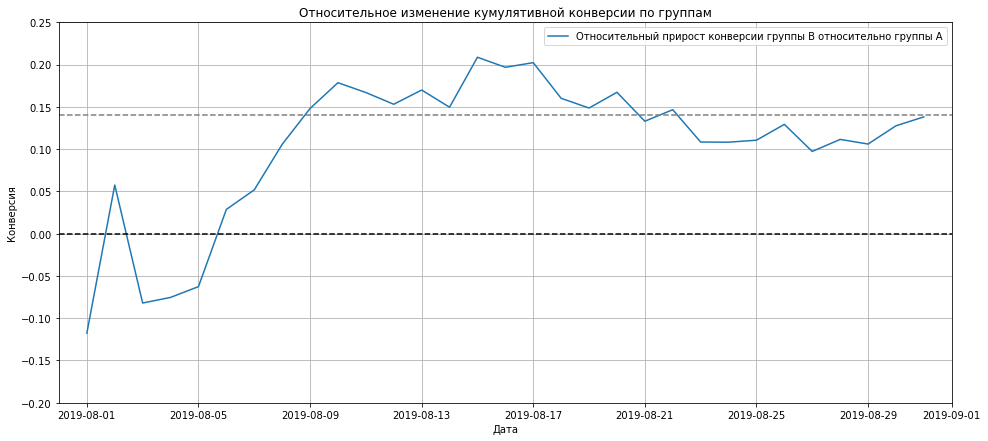

In [13]:
#объединим значения куммулятивной конверсии групп в один df
mergedCumConversions = cumDataA[['date','conversion']]\
    .merge(cumDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

#строим график
plt.figure(figsize=(16,7))
plt.plot(mergedCumConversions['date'], mergedCumConversions['conversionB']/mergedCumConversions['conversionA']-1, 
         label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.title("Относительное изменение кумулятивной конверсии по группам")
plt.xlabel("Дата")
plt.ylabel("Конверсия")
plt.legend()
plt.grid()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.14, color='grey', linestyle='--')
plt.axis(["2019-07-31", '2019-09-01', -0.2, 0.25])
plt.show()

В начале теста группа B немного проигрывала группе A, но затем, после 05.08.2019 вырвалась вперёд. Потом её конверсия немного снижалась, но теперь немного растёт, достигнув значения **0.14**. В целом отношение конверсии установилось вокруг  этого значения, но выводы по тесту делать рано, необходимо проанализировать аномалии, возможно, они изменят общую картину.

##### Построим точечный график количества заказов по пользователям

In [14]:
#подсчитаем количество заказов по пользователям
ordersByUsers = orders.groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'})
ordersByUsers.columns = ['userId', 'orders']

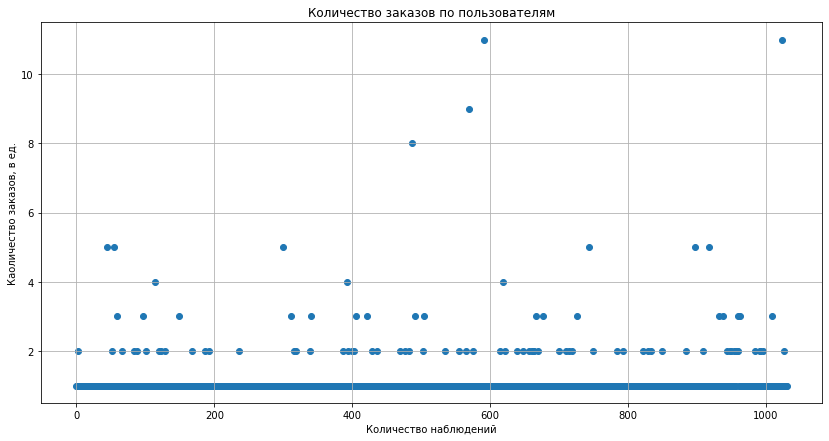

In [15]:
# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.figure(figsize=(14,7))
plt.grid()
plt.scatter(x_values, ordersByUsers['orders'])
plt.title("Количество заказов по пользователям")
plt.xlabel("Количество наблюдений")
plt.ylabel("Каоличество заказов, в ед.")
plt.show()

Большинство покупателей заказывали только один раз. Однако есть и пользователи с 2-3 заказами, но по графику не ясно являются ли они аномалиями или нет. Поэтому далее посчитаем выборочные перцентили количества заказов на одного пользователя.

##### Рассчитаем 95-й и 99-й перцентили количества заказов на пользователя

In [16]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


Не более 5% пользователей совершают более 2 заказов и не более 1% - более 4. В качестве границы для определения аномальных пользователей возьмем тех, кто совершил 3 заказа и более.

##### Построим точечный график стоимости заказов по пользователям

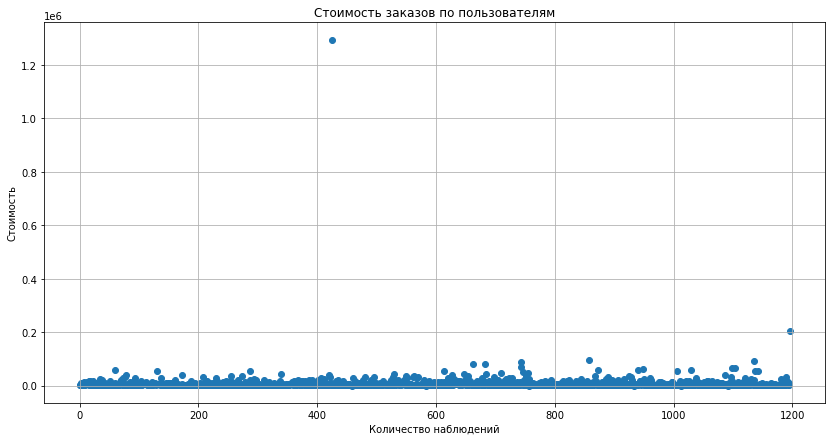

In [17]:
# серия из чисел от 0 до количества наблюдений в orders, т.е. количество заказов
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(14,7))
plt.grid()
plt.scatter(x_values, orders['revenue'])
plt.title("Стоимость заказов по пользователям")
plt.xlabel("Количество наблюдений")
plt.ylabel("Стоимость")
plt.show()

Присутствует заказ со стоимостью свыше 1.2млн. рублей, это явный выброс для интернет-магазина, также можно заметить выбивающийся заказ со стоимостью около 200 000 рублей, но по графику не ясно являются ли это значение аномалией. Поэтому далее снова обратимся к расчету выборочных перцентилей стоимости заказов на одного пользователя.

##### Рассчитаем  95-й и 99-й перцентили стоимости заказов

In [18]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


Таким образом, выявленные нами значения на предыдущем шаге явно являются выбросами. Не более 5% заказов дороже 28 000 рублей и не более 1% дороже 58 233 рублей. В качестве границы для определения аномальной стоимости заказов будем считать 35 000 рублей.

##### Гипотезы

Отличаются ли значения конверсии групп А и В, и значимо ли различие? Начнём с формулировки гипотезы: 
1. Нулевой гипотезы **H₀ - «значения конверсии групп А и В равны»**
2. Альтернативной гипотезы **H₁ - «значения конверсии групп А и В различаются»**

Отличаются ли значения средних чеков групп А и В? Гипотезы: 
1. Нулевая гипотеза **H₀ - «значения конверсии групп А и В равны»**
2. Альтернативная гипотеза **H₁ - «значения конверсии групп А и В различаются»**

##### Рассчитаем  статистическую значимость различий в конверсии между группами по «сырым» данным

In [19]:
#количество дневных посетителей группы А
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
#куммулятивное количество дневных посетителей группы А
visitorsADaily['visitorsCumA'] = visitorsADaily['visitorsPerDateA'].cumsum(axis = 0)

#количество дневных посетителей группы В
visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']
#куммулятивное количество дневных посетителей группы В
visitorsBDaily['visitorsCumB'] = visitorsBDaily['visitorsPerDateB'].cumsum(axis = 0) 

#количество дневных заказов и сумма выручки по датам для группы А
ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : 'nunique', 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']
#куммулятивное количество заказов и сумма покупателей группы А
ordersADaily[['ordersCumA','revenueCumA']] = ordersADaily[['ordersPerDateA','revenuePerDateA']].cumsum(axis = 0) 

#количество дневных заказов и сумма выручки по датам для группы В
ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : 'nunique', 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']
#куммулятивное количество заказов и сумма покупателей группы В
ordersBDaily[['ordersCumB','revenueCumB']] = ordersBDaily[['ordersPerDateB','revenuePerDateB']].cumsum(axis = 0) 

#объединим в один датафрейм
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\


#количество пользователей группы А, которые заказывали хотя бы 1 раз
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsersA.columns = ['userId', 'orders']

#количество пользователей группы В, которые заказывали хотя бы 1 раз
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsersB.columns = ['userId', 'orders'] 

#соответствие числа заказов каждому пользователю группы А, если нет заказов, то 0
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, 
    index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

#соответствие числа заказов каждому пользователю группы В, если нет заказов, то 0
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, 
    index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) 

#посчитаем статистическую значимость различия конверсии, тестом Манна-Уитни
pvalueMW = stats.mannwhitneyu(sampleA, sampleB)[1]
print("p-значение теста Манна-Уитни:\033[1m{0:.4f}\033[0m".format(pvalueMW))

alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

if pvalueMW < alpha:
    print("\033[1mОтвергаем нулевую гипотезу\033[0m, следовательно, по 'сырым' данным есть статистически значимые различия")
else:
    print("\033[1mНе получилось отвергнуть нулевую гипотезу\033[0m, следовательно по 'сырым' данным различия статистически незначимы") 

#рассчитаем относительное различие в конверсии между группами
rel_diff = (data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1
print("Относительное различие в конверсии: \033[1m{0:.1%}\033[0m".format(rel_diff)) 

p-значение теста Манна-Уитни:0.0084
Отвергаем нулевую гипотезу, следовательно, по 'сырым' данным есть статистически значимые различия
Относительное различие в конверсии: 13.8%


По «сырым» данным p-значение мало и довольно велико различие в конверсии. Теперь давайте посмотрим на статистическую значимость различий в среднем чеке заказа между группам.

##### Рассчитаем  статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

In [20]:
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу
pvalueMWrev = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]
print("p-значение теста Манна-Уитни:\033[1m{0:.4f}\033[0m".format(pvalueMWrev))
if pvalueMWrev < alpha:
    print("\033[1mОтвергаем нулевую гипотезу\033[0m, следовательно, по 'сырым' данным  в среднем чеке заказа есть статистически значимые различия")
else:
    print("\033[1mНе получилось отвергнуть нулевую гипотезу\033[0m, следовательно по 'сырым' данным в среднем чеке заказа различия статистически незначимы") 

rel_diff_rev = orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1
print('Относительный прирост среднего чека группы B: \033[1m{0:.2%}\033[0m'.format(rel_diff_rev)) 



p-значение теста Манна-Уитни:0.3646
Не получилось отвергнуть нулевую гипотезу, следовательно по 'сырым' данным в среднем чеке заказа различия статистически незначимы
Относительный прирост среднего чека группы B: 25.87%


Несмотря на то, что прирост среднего чека группы B составляет **25.87%**, статистический тест показывает нам, что данное отличие является статистически **незначимым**, наверняка это обусловлено всего 1 гиганским выбросом, который мы выявили ранее. Давайте очистим данные от выбросов.

##### Рассчитаем  статистическую значимость различий в конверсии между группами по «очищенным» данным

In [21]:
#найдем пользователей с большим количеством заказов (3 и более)
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis = 0)
#найдем пользователей с большой суммой заказа (более 30 000)
usersWithExpensiveOrders = orders[orders['revenue'] > 35000]['visitorId']
#объединим юзеров
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print('Количество аномальных пользователей:\033[1m',abnormalUsers.shape[0],'\033[0m') 

Количество аномальных пользователей: 53 


In [22]:
#удалим аномальных пользователей
sampleAFiltered = pd.concat([ordersByUsersA[~(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)
sampleBFiltered = pd.concat([ordersByUsersB[~(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0) 

#посчитаем статистическую значимость различия конверсии, тестом Манна-Уитни
pvalueMW = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]
print("p-значение теста Манна-Уитни:\033[1m{0:.4f}\033[0m".format(pvalueMW))

alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

if pvalueMW < alpha:
    print("\033[1mОтвергаем нулевую гипотезу\033[0m, следовательно, есть статистически значимые различия")
else:
    print("\033[1mНе получилось отвергнуть нулевую гипотезу\033[0m, следовательно статистически значимых различий нет") 

#рассчитаем относительное различие в конверсии между группами
rel_diff = sampleBFiltered.mean()/sampleAFiltered.mean()-1
print("Относительный прирост конверсии очищенной группы B: \033[1m{0:.1%}\033[0m".format(rel_diff)) 

p-значение теста Манна-Уитни:0.0050
Отвергаем нулевую гипотезу, следовательно, есть статистически значимые различия
Относительный прирост конверсии очищенной группы B: 17.9%


Как и в случае с сырыми данными, статистическая значимость достигнута. Группа В значимо лучше группы А.

##### Рассчитаем  статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [23]:
#удалим аномальных пользователей в заказах
ordersAFiltered = orders[(orders['group']=='A') & (~(orders['visitorId'].isin(abnormalUsers)))]['revenue']
ordersBFiltered = orders[(orders['group']=='B') & (~(orders['visitorId'].isin(abnormalUsers)))]['revenue'] 

alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу
    
pvalueMWrev = stats.mannwhitneyu(ordersAFiltered, ordersBFiltered)[1]
print("p-значение теста Манна-Уитни:\033[1m{0:.4f}".format(pvalueMWrev))

if pvalueMWrev < alpha:
    print("\033[1mОтвергаем нулевую гипотезу\033[0m, следовательно, в среднем чеке заказа есть статистически значимые различия")
else:
    print("\033[1mНе получилось отвергнуть нулевую гипотезу\033[0m, следовательно статистически значимых различий нет") 

rel_diff_rev = ordersBFiltered.mean()/ordersAFiltered.mean()-1
print('Относительный прирост среднего чека группы B: \033[1m{0:.2%}\033[0m'.format(rel_diff_rev)) 


p-значение теста Манна-Уитни:0.4424
Не получилось отвергнуть нулевую гипотезу, следовательно статистически значимых различий нет
Относительный прирост среднего чека группы B: 2.18%


P-значение практически такое же, как и по "сырым" данным, статистически значимых различий в среднем чеке нет. Зато по очищенным данным, исключив гиганский выброс, мы видим, что средний чек группы В на самом деле незначительно выше группы А.

## Шаг 3. Вывод


Нами на основе вышеизложенного анализа сделаны следующие выводы:

1. График различия конверсии между группами сообщает, что результаты **группы B лучше группы A**: зафиксировались около среднего значения, при это достигнув **относительного значения 0.14** по отношению к группе А.
2. **Есть статистически значимое различие по конверсии** между группами как по сырым данным, так и после фильтрации аномалий.
3. График различия среднего чека колеблется, он-то позволил найти аномалии. Критерий Манна-Уитни показал нам, что **нет статистически значимого различия по среднему чеку** между группами как по сырым данным, так и после фильтрации аномалий. Кроме того, после удаления аномалий прирост среднего чека группы В совсем немного выше чека группы А, на 2.18%

   

Таким образом, по результатам теста примем решение **остановить тест, зафиксировать победу группы В.**
    

-------------------------